In [1]:
from func import *
import numpy as np
import pandas as pd

In [2]:
#inf = np.finfo(np.float32).max
inf = 1_000_000

In [3]:
C = np.array([
    [ 0, 0],
    [10, 0],
    [ 4, 3],
    [10, 3],
    [12, 3],
])
assert np.shape(C)[1] == 2, "Las coordenadas se componen de 2 valores."

In [4]:
S = np.array([
    [0,0,0],
    [0,0,1],
    [1,1,1],
    [1,1,1],
    [1,1,1]
])
assert np.shape(S)[1] == 3, "La matriz S debe estar compuesta de 3 columnas."
assert np.shape(S)[0] == np.shape(C)[0], "La matriz S y la matriz C deben tener la misma forma."

In [5]:
B = np.array([
    [0,2],
    [2,3],
    [1,3],
    [3,4]
])
assert np.shape(B)[1] == 2, "Las barras deben estar definidas por dos puntos"

In [6]:
EAI = np.array([
    [1, inf, 1],
    [1, inf, 1],
    [1, inf, 1],
    [1, inf, 1]
])

In [7]:
L = np.linalg.norm(np.diff(C[B], axis=1), axis=2)
with np.errstate(divide='ignore'):
    alpha = np.arctan(np.divide(*(np.diff(C[B], axis=1).squeeze().T[::-1])))
np.rad2deg(alpha)
EAIL = np.hstack([EAI, L])

In [8]:
with np.errstate(divide='ignore', ):    
    Ki = []
    A = []
    Kt = []
    for el, t in zip(EAIL, alpha):
        Ki.append(stiffness_2d(*el))
        A.append(rot_2d(t))
        Kt.append(A[-1].T @ Ki[-1] @ A[-1])
    Ki = np.array(Ki)
    A = np.array(A)
    Kt = np.array(Kt)

In [9]:
def format(value) -> str:
    #if np.abs(value) > 10000:
    #    return 'inf'
    return value.format

pd.options.display.float_format = '{:.3F}'.format

In [10]:
Kg = np.zeros(shape=(S.size,S.size))
GLg = np.zeros(shape=(S.size, 1))
_idx = np.arange(0, S.size)
G_idx = _idx.reshape(len(S), -1)[B].reshape(-1, 6)
for idx, Ki, GL in zip(G_idx, Kt, S[B]):
    Kg[*np.meshgrid(idx, idx)] += Ki
    # GLg[idx] += GL.ravel()
GLg = S.ravel()
Kg.shape, GLg.shape

((15, 15), (15,))

In [11]:
pd.DataFrame(np.diag(GLg) @ Kg @ np.diag(GLg), index=_idx + 1, columns=_idx + 1)\
    .pipe(lambda x: x.loc[(x != 0).any(axis=0), (x != 0).any(axis=1)])

,6,7,8,9,10,11,12,13,14,15
6,1.333,0.000,0.000,0.000,0.667,-0.000,0.667,0.000,0.000,0.000
7,0.000,294666.701,95999.954,0.144,-166666.667,0.000,0.000,0.000,0.000,0.000
8,0.000,95999.954,72000.117,-0.025,0.000,-0.056,0.167,0.000,0.000,0.000
9,0.000,0.144,-0.025,1.467,0.000,-0.167,0.333,0.000,0.000,0.000
10,0.667,-166666.667,0.000,0.000,666667.111,0.000,0.667,-500000.000,0.000,0.000
11,-0.000,0.000,-0.056,-0.167,0.000,333334.889,1.333,0.000,-1.500,1.500
12,0.667,0.000,0.167,0.333,0.667,1.333,4.000,0.000,-1.500,1.000
13,0.000,0.000,0.000,0.000,-500000.000,0.000,0.000,500000.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,-1.500,-1.500,0.000,1.500,-1.500
15,0.000,0.000,0.000,0.000,0.000,1.500,1.000,0.000,-1.500,2.000


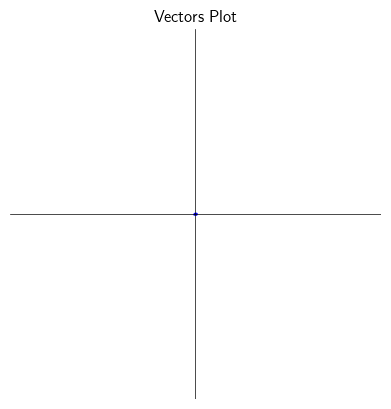

In [12]:
fig, ax = plt.subplots()
plot_vectors(C[B] ,ax=ax, margin=100)
plt.show()